# Projekt  - studium przypadku


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_path = "vgsales.csv"
df = pd.read_csv(data_path)

# Eksploracja danych
To będzie bardzo długa część, zanim zaczną się jakiekolwiek "systemy uczące się"

In [20]:
# Podsumowanie statystyczne dla danych ilościowych:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [21]:
# print("Kolumny:")
# print(df.columns.tolist())
print("Kolumny i ich typy danych:")
print(df.dtypes)

Kolumny i ich typy danych:
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [22]:
print("\nSprawdzenie brakujących danych:")
print(df.isnull().sum())


Sprawdzenie brakujących danych:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [23]:
# Wydzielenie kolumn nominalnych i ilościowych
nominal_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f"Atrybuty nominalne ({len(nominal_cols)}): {nominal_cols}")
print(f"Atrybuty ilościowe ({len(numeric_cols)}): {numeric_cols}")

Atrybuty nominalne (4): ['Name', 'Platform', 'Genre', 'Publisher']
Atrybuty ilościowe (7): ['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


Histogramy danych ilościowych:


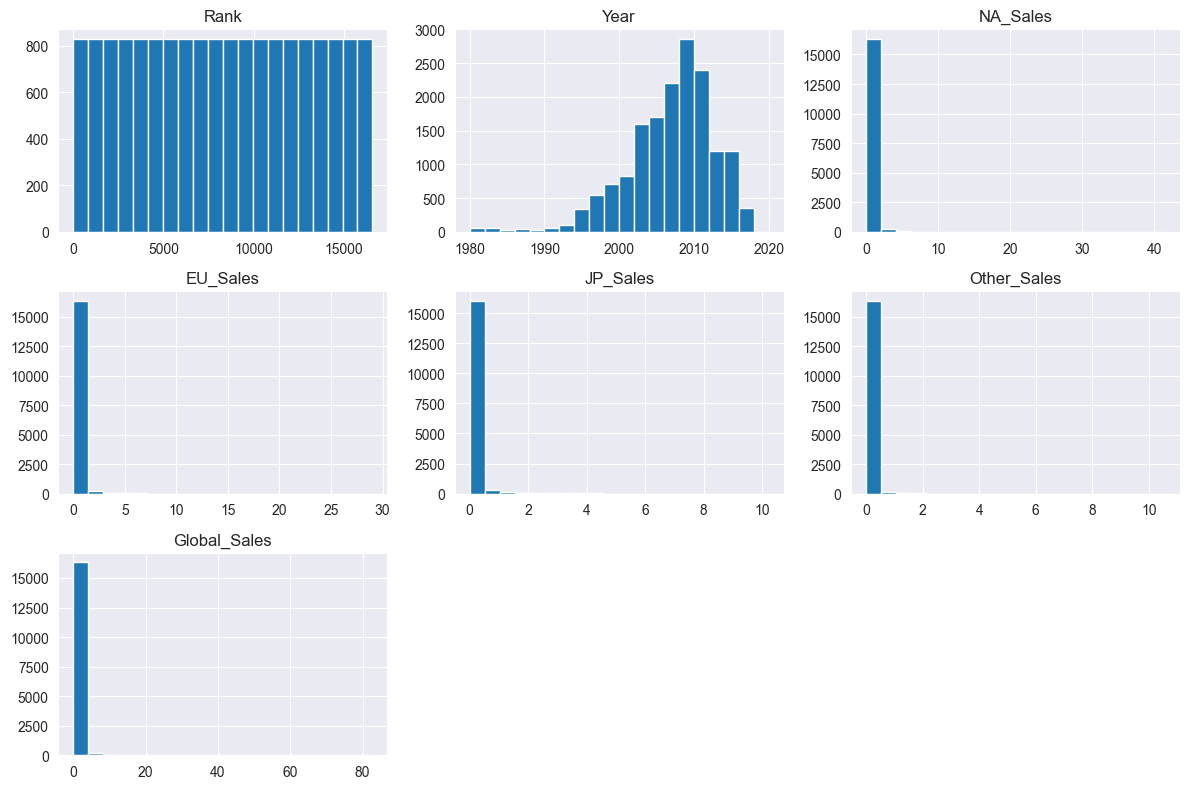

In [24]:
print("Histogramy danych ilościowych:")
df[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

In [25]:
# Najczęstsze wartości w kolumnach nominalnych
for col in nominal_cols:
    print(f"\nTop wartości dla {col}:")
    print(df[col].value_counts().head(10))


Top wartości dla Name:
Name
Need for Speed: Most Wanted    12
Ratatouille                     9
FIFA 14                         9
LEGO Marvel Super Heroes        9
Madden NFL 07                   9
Cars                            8
FIFA Soccer 13                  8
LEGO The Hobbit                 8
Monopoly                        8
LEGO Jurassic World             8
Name: count, dtype: int64

Top wartości dla Platform:
Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
Name: count, dtype: int64

Top wartości dla Genre:
Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Name: count, dtype: int64

Top wartości dla Publisher:
Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games              


Korelacje między zmiennymi ilościowymi:
                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178814 -0.401362 -0.379123 -0.267785    -0.332986   
Year          0.178814  1.000000 -0.091402  0.006014 -0.169316     0.041058   
NA_Sales     -0.401362 -0.091402  1.000000  0.767727  0.449787     0.634737   
EU_Sales     -0.379123  0.006014  0.767727  1.000000  0.435584     0.726385   
JP_Sales     -0.267785 -0.169316  0.449787  0.435584  1.000000     0.290186   
Other_Sales  -0.332986  0.041058  0.634737  0.726385  0.290186     1.000000   
Global_Sales -0.427407 -0.074735  0.941047  0.902836  0.611816     0.748331   

              Global_Sales  
Rank             -0.427407  
Year             -0.074735  
NA_Sales          0.941047  
EU_Sales          0.902836  
JP_Sales          0.611816  
Other_Sales       0.748331  
Global_Sales      1.000000  


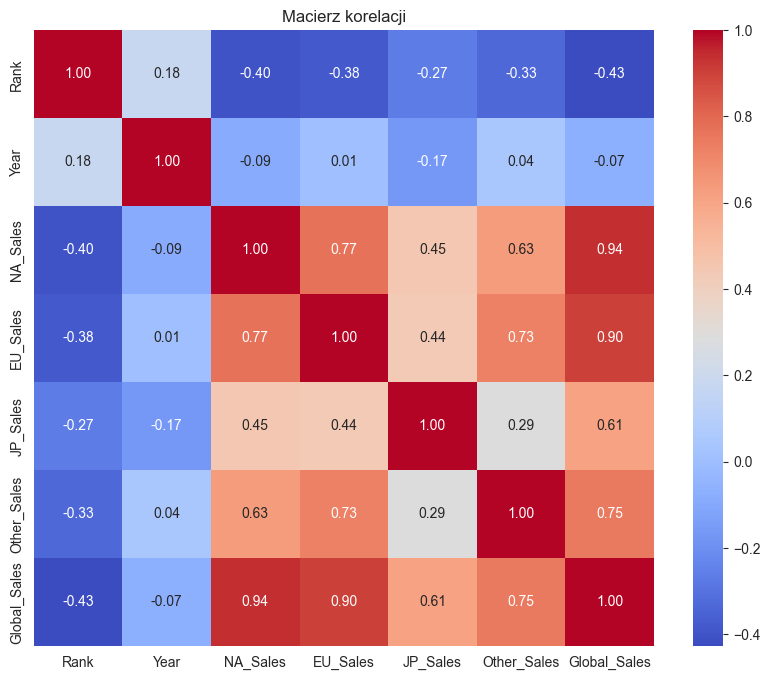

In [26]:
# Korelacje między zmiennymi ilościowymi
print("\nKorelacje między zmiennymi ilościowymi:")
corr = df[numeric_cols].corr()
print(corr)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Macierz korelacji")
plt.show()

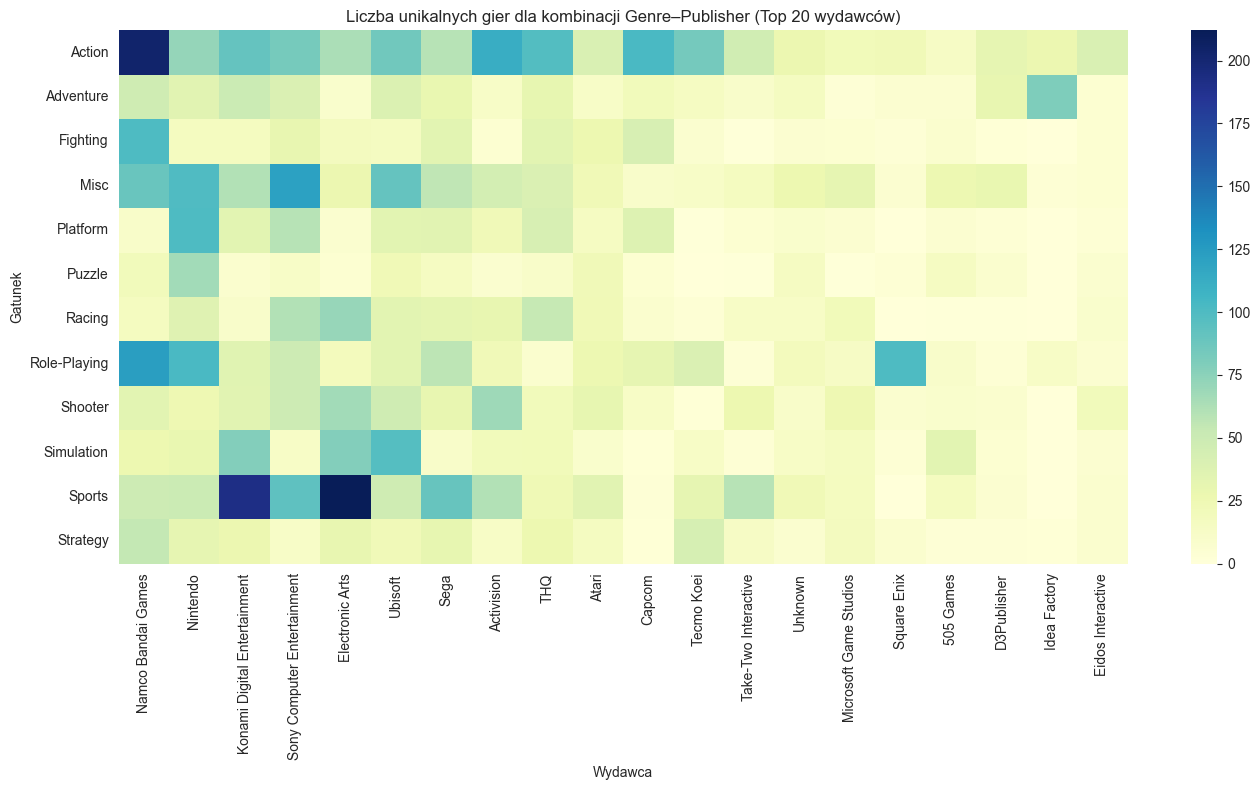

In [27]:
# Grupujemy dane po unikalnych grach (nazwa, wydawca, gatunek) i sumujemy sprzedaż
unique_games = df.groupby(['Name', 'Publisher', 'Genre'], as_index=False).agg({'Global_Sales': 'sum'})

# Liczba unikalnych gier dla kombinacji Gatunek–Wydawca
genre_publisher_counts = unique_games.pivot_table(index='Genre', columns='Publisher', aggfunc='size', fill_value=0)

# Top 20 wydawców wg liczby unikalnych gier
top_publishers = unique_games['Publisher'].value_counts().head(20).index

# Filtrowanie tylko top wydawców
filtered_counts = genre_publisher_counts[top_publishers]

plt.figure(figsize=(14, 8))
sns.heatmap(filtered_counts, annot=False, cmap="YlGnBu")
plt.title("Liczba unikalnych gier dla kombinacji Genre–Publisher (Top 20 wydawców)")
plt.ylabel("Gatunek")
plt.xlabel("Wydawca")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

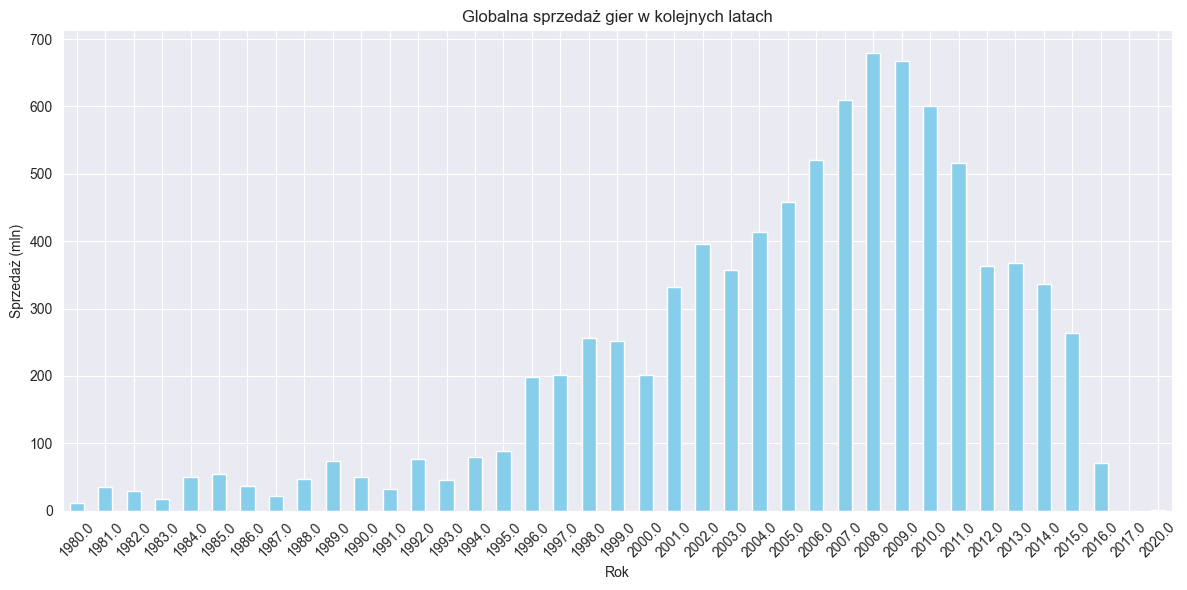

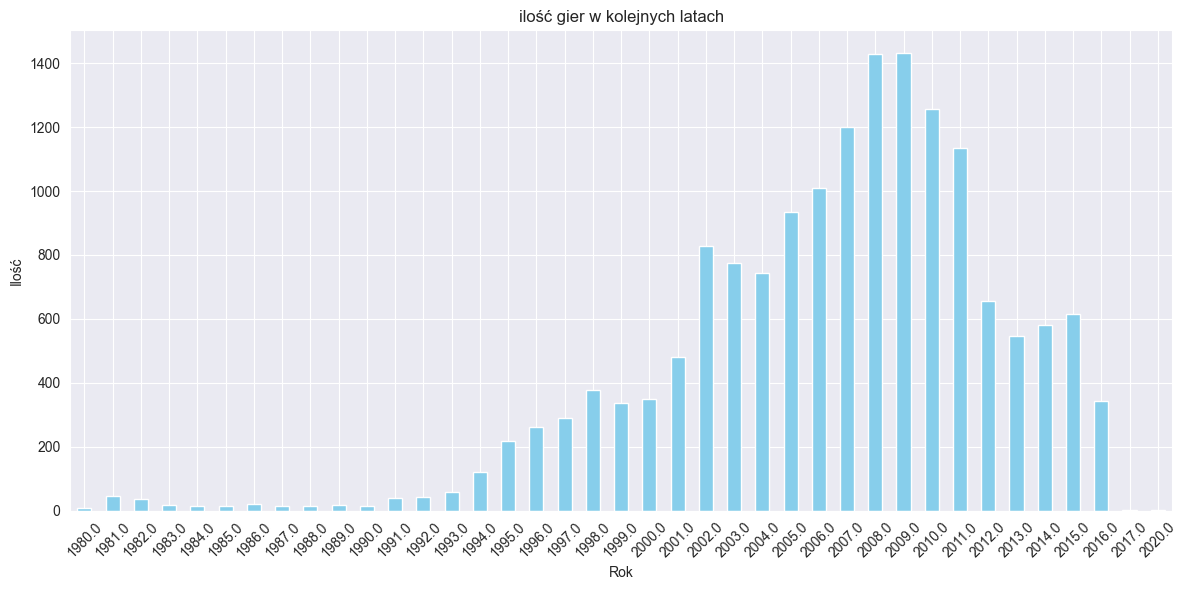

In [40]:
sales_by_year = df.groupby('Year')['Global_Sales'].sum().dropna()

plt.figure(figsize=(12, 6))
sales_by_year.plot(kind='bar', color='skyblue')
plt.title("Globalna sprzedaż gier w kolejnych latach")
plt.ylabel("Sprzedaż (mln)")
plt.xlabel("Rok")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Chodzi o porównanie ILE mam danych. - spadek wynika raczej z ich braku, a nie tego że przestano produkować gry ;)
count_by_year = df.groupby('Year')['Global_Sales'].count().dropna()
plt.figure(figsize=(12, 6))
count_by_year.plot(kind='bar', color='skyblue')
plt.title("ilość gier w kolejnych latach")
plt.ylabel("Ilość")
plt.xlabel("Rok")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# TODO - porównać z większym zbiorem (czy sprzedaż spada? bo chyba nie, bo covid happend)


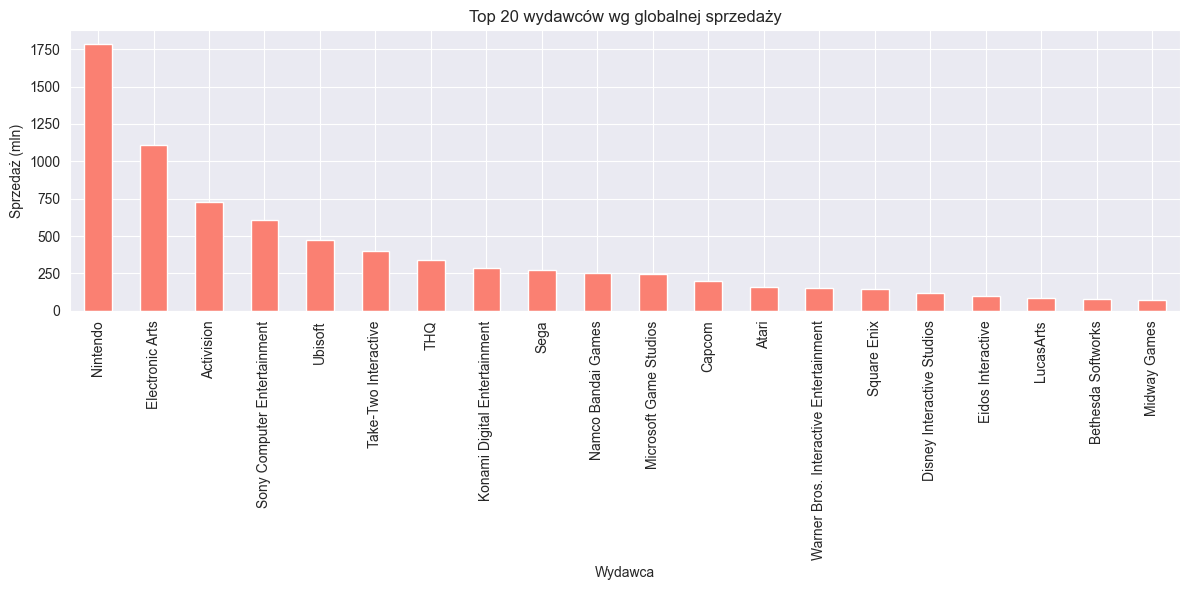

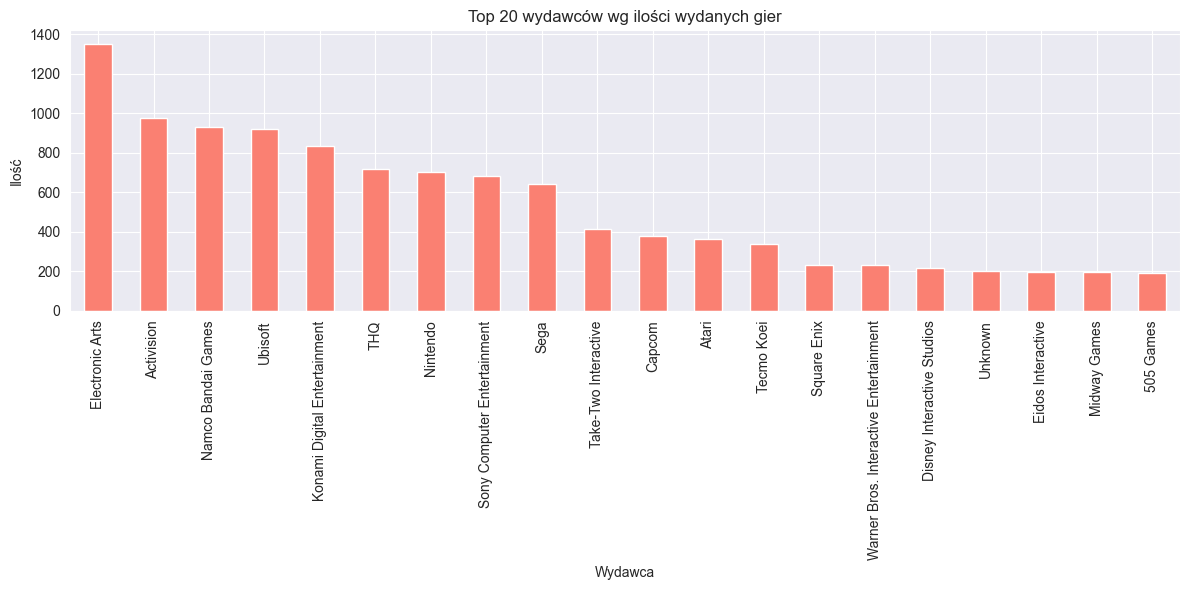

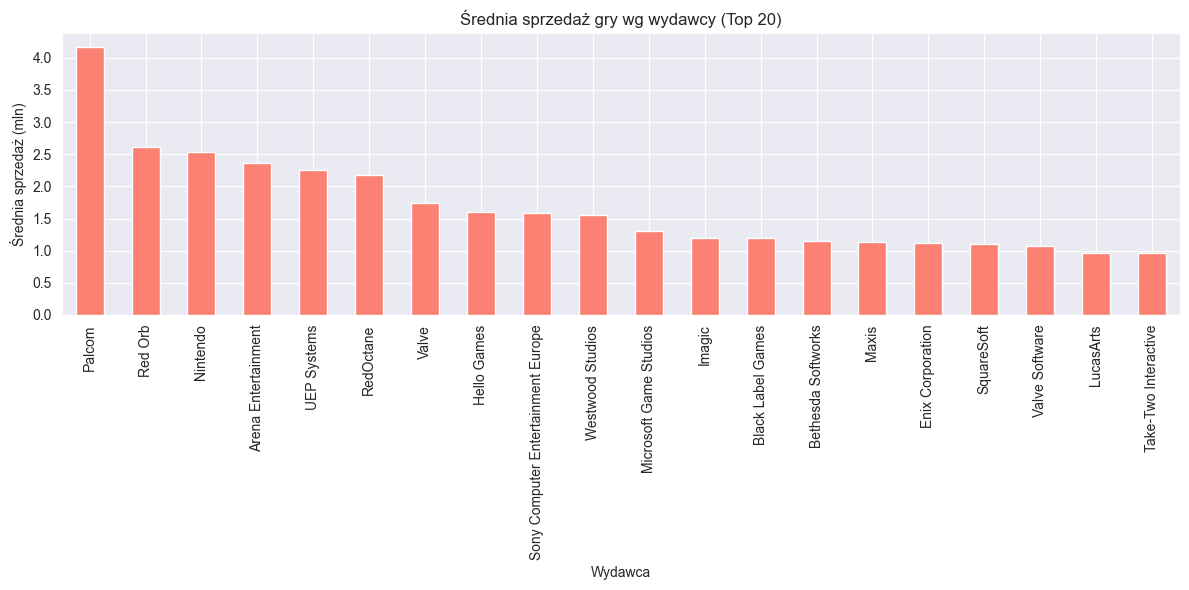

In [29]:
sales_by_publisher = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
sales_by_publisher.plot(kind='bar', color='salmon')
plt.title("Top 20 wydawców wg globalnej sprzedaży")
plt.ylabel("Sprzedaż (mln)")
plt.xlabel("Wydawca")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

count_by_publisher = df.groupby('Publisher')['Global_Sales'].count().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
count_by_publisher.plot(kind='bar', color='salmon')
plt.title("Top 20 wydawców wg ilości wydanych gier")
plt.ylabel("Ilość")
plt.xlabel("Wydawca")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

avg_sales_per_game = df.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
avg_sales_per_game.plot(kind='bar', color='salmon')
plt.title("Średnia sprzedaż gry wg wydawcy (Top 20)")
plt.ylabel("Średnia sprzedaż (mln)")
plt.xlabel("Wydawca")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# TODO porównanie z innymi danymi

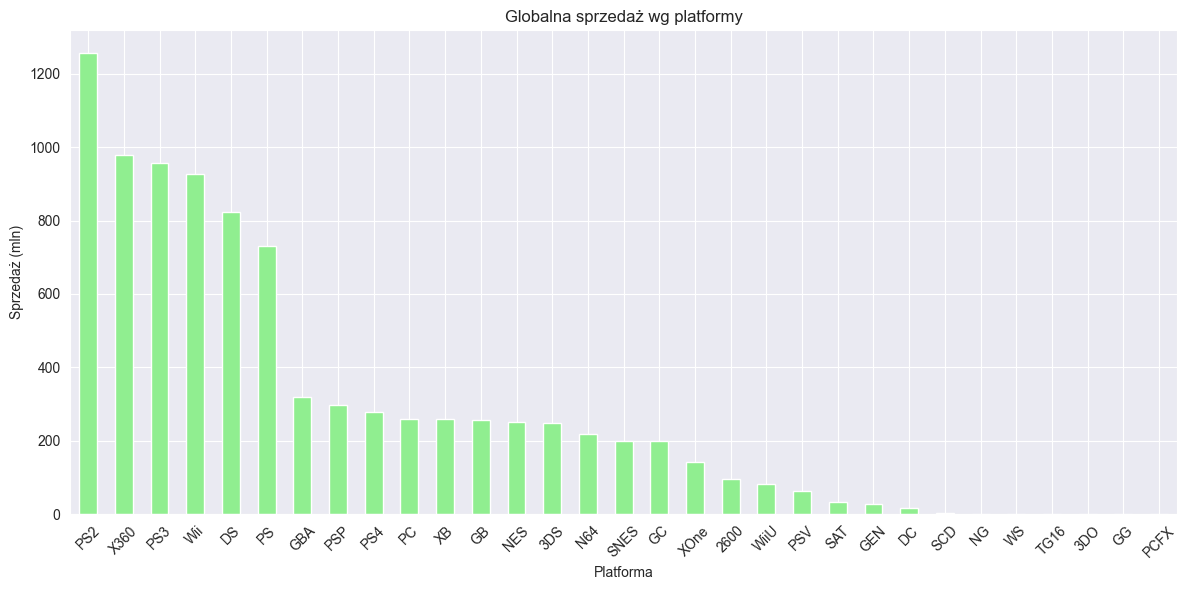

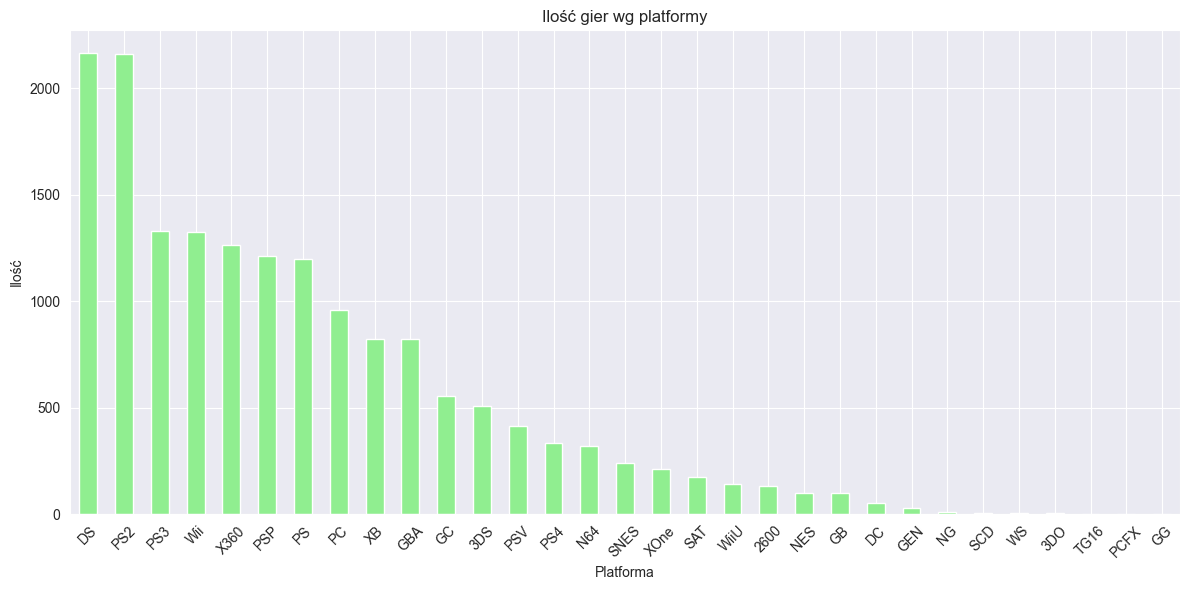

In [30]:
sales_by_platform = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sales_by_platform.plot(kind='bar', color='lightgreen')
plt.title("Globalna sprzedaż wg platformy")
plt.ylabel("Sprzedaż (mln)")
plt.xlabel("Platforma")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

count_by_platform = df.groupby('Platform')['Global_Sales'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
count_by_platform.plot(kind='bar', color='lightgreen')
plt.title("Ilość gier wg platformy")
plt.ylabel("Ilość")
plt.xlabel("Platforma")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

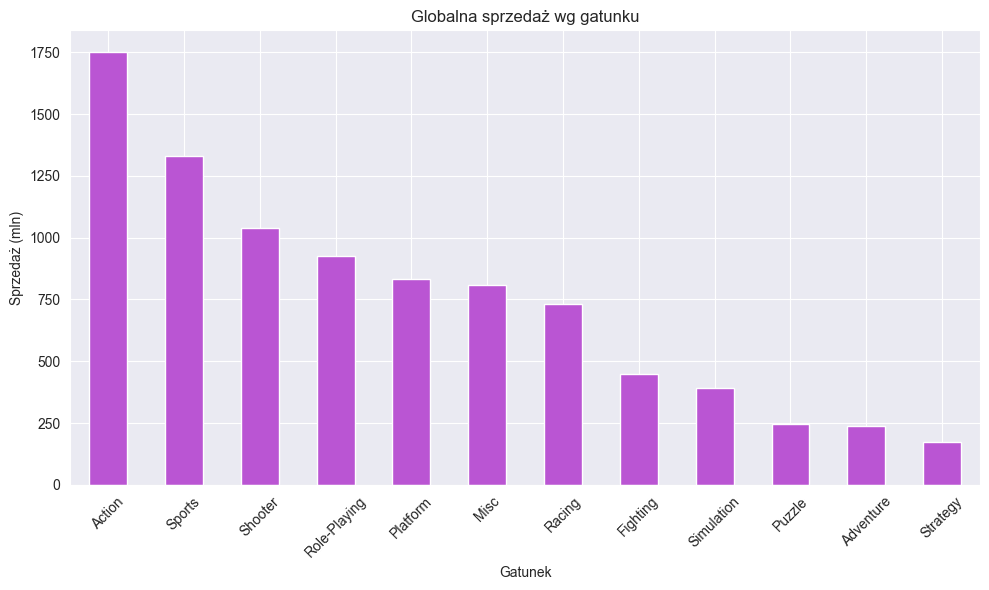

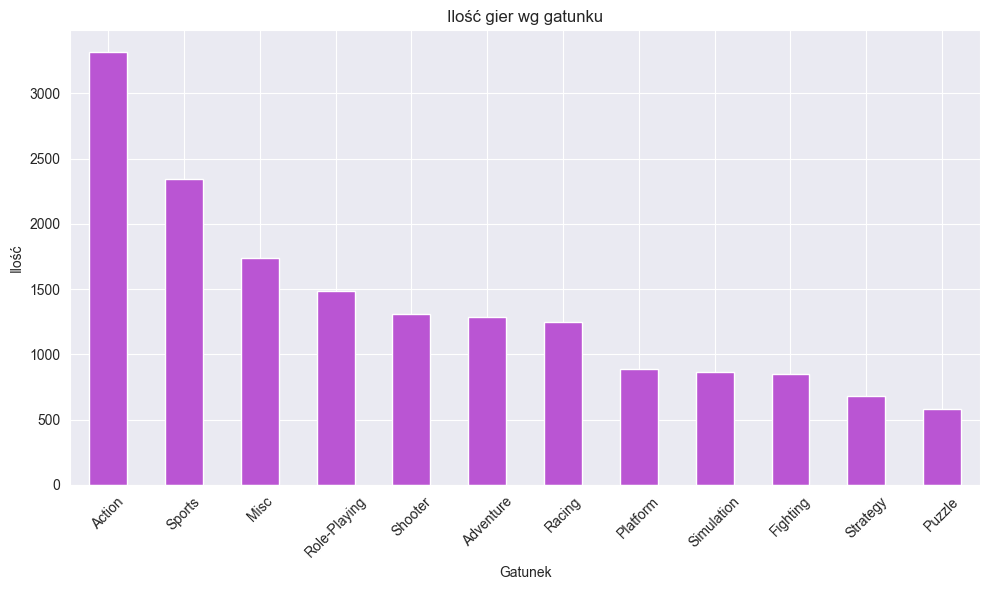

In [31]:
sales_by_genre = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sales_by_genre.plot(kind='bar', color='mediumorchid')
plt.title("Globalna sprzedaż wg gatunku")
plt.ylabel("Sprzedaż (mln)")
plt.xlabel("Gatunek")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

count_by_genre = df.groupby('Genre')['Global_Sales'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
count_by_genre.plot(kind='bar', color='mediumorchid')
plt.title("Ilość gier wg gatunku")
plt.ylabel("Ilość")
plt.xlabel("Gatunek")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

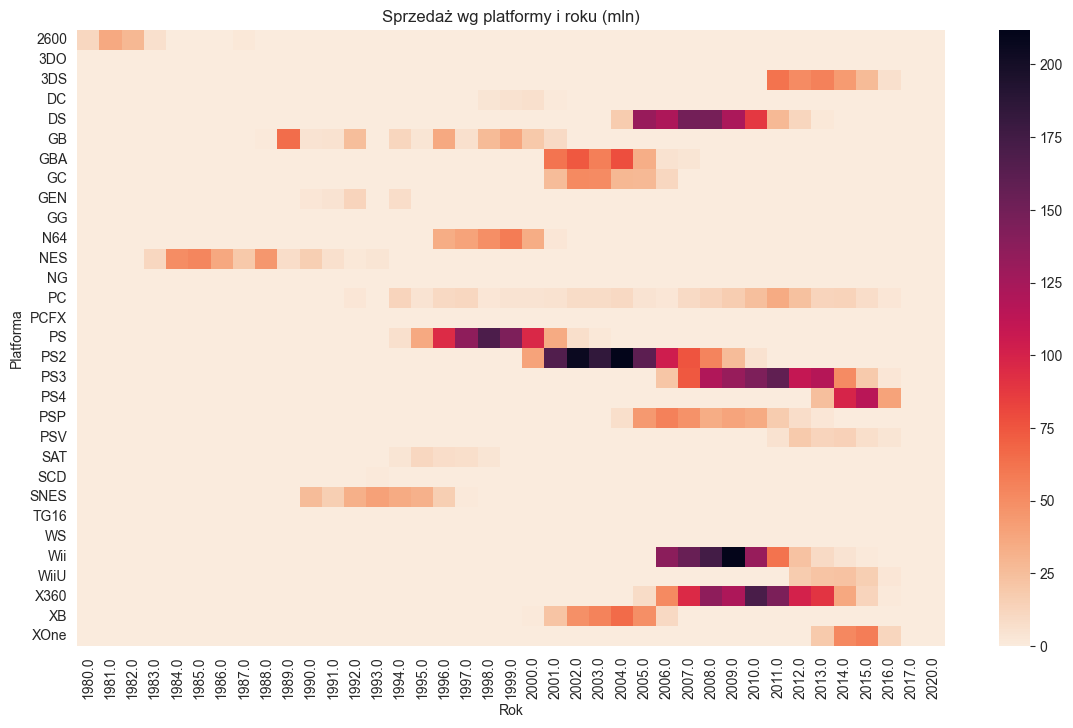

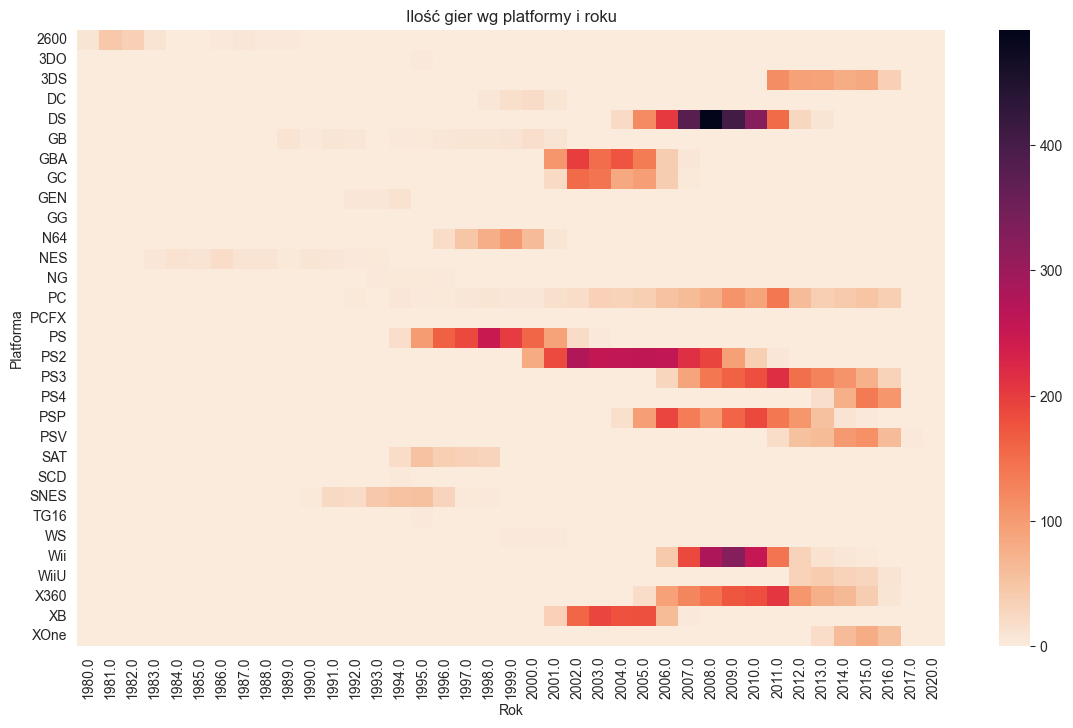

In [32]:
platform_year_sales = df.pivot_table(index='Platform', columns='Year', values='Global_Sales', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(platform_year_sales, cmap="rocket_r")
plt.title("Sprzedaż wg platformy i roku (mln)")
plt.xlabel("Rok")
plt.ylabel("Platforma")
plt.show()

platform_year_count = df.pivot_table(index='Platform', columns='Year', values='Global_Sales', aggfunc='count',fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(platform_year_count, cmap="rocket_r")
plt.title("Ilość gier wg platformy i roku")
plt.xlabel("Rok")
plt.ylabel("Platforma")
plt.show()

Ostatnie, dodatkowe statystyki:

In [33]:
# Suma sprzedaży na poziomie tytułu
# sales_by_title = df.groupby('Name')['Global_Sales'].sum()
# print("Gra o największej sprzedaży:",end=' ')
# print(sales_by_title.idxmax(), "->", round(sales_by_title.max(), 2), "mln")
# print("Gra o najmniejszej sprzedaży (większej od 0):",end=' ')
# min_sales = sales_by_title[sales_by_title > 0]
# print(min_sales.idxmin(), "->", round(min_sales.min(), 2), "mln")

# Średnia sprzedaż na grę (unikalne gry!) dla każdego wydawcy
# unique_games = df.groupby(['Name', 'Publisher'], as_index=False).agg({'Global_Sales': 'sum'})
# avg_sales_by_publisher = unique_games.groupby('Publisher')['Global_Sales'].mean()
# print("Wydawca z najwyższą średnią sprzedażą na grę:",end=' ')
# print(avg_sales_by_publisher.idxmax(), "->", round(avg_sales_by_publisher.max(), 2), "mln")
# print("Wydawca z najniższą średnią sprzedażą na grę:",end=' ')
# print(avg_sales_by_publisher.idxmin(), "->", round(avg_sales_by_publisher.min(), 2), "mln")

# unique_games = df.groupby(['Name', 'Genre'], as_index=False).agg({'Global_Sales': 'sum'})
# avg_sales_by_genre = unique_games.groupby('Genre')['Global_Sales'].mean()
# print("Gatunek z najwyższą średnią sprzedażą:",end=' ')
# print(avg_sales_by_genre.idxmax(), "->", round(avg_sales_by_genre.max(), 2), "mln")
# print("Gatunek z najniższą średnią sprzedażą:",end=' ')
# print(avg_sales_by_genre.idxmin(), "->", round(avg_sales_by_genre.min(), 2), "mln")

# unique_games = df.groupby(['Name', 'Platform'], as_index=False).agg({'Global_Sales': 'sum'})
# avg_sales_by_platform = unique_games.groupby('Platform')['Global_Sales'].mean()
# print("Platforma z najwyższą średnią sprzedażą gry:",end=' ')
# print(avg_sales_by_platform.idxmax(), "->", round(avg_sales_by_platform.max(), 2), "mln")
# print("Platforma z najniższą średnią sprzedażą gry:",end=' ')
# print(avg_sales_by_platform.idxmin(), "->", round(avg_sales_by_platform.min(), 2), "mln")
print("Widać nawykresach :)")

Widać nawykresach :)


# Trening modeli

Docelowo chciałbym zająć się treningiem modeli dot. regresji i przewidywania sprzedaży, ale też pomyślałem o podziale gier na 3 zbiory: hit, average i flop (lub inną ilość zbiorów) i potencjalnej klasyfikacji.
Można też

In [34]:
# Jeśli XGBoost nie jest zainstalowany
# !pip install xgboost
# !pip install -U scikit-learn


In [35]:
# Importy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")


In [41]:
# Przygotowanie danych

# Wczytaj dane
df = pd.read_csv("vgsales.csv")

# Usuń brakujące dane oraz dane z lat 2016 i późniejszych – zbiór jest niekompletny
df = df.dropna(subset=['Publisher', 'Genre', 'Platform', 'Year', 'Global_Sales'])
df = df[df['Year'] < 2016]

# Zakładamy, że chcemy przewidywać Global_Sales
y = df['Global_Sales']
# X = df.drop(columns=['Name', 'Global_Sales'])
X = df.drop(columns=['Name', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

# Określenie kolumn kategorycznych i liczbowych
categorical_cols = ['Publisher', 'Genre', 'Platform']
numeric_cols = ['Year']

# One-hot encoding dla cech kategorycznych
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', 'passthrough', numeric_cols)
])

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [42]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"Wyniki dla {name}:")
    print(f"MAE:  {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²:   {r2:.3f}")
    return y_pred


# Regresja liniowa
linreg_pipeline = Pipeline([
    ('pre', preprocessor),
    ('reg', LinearRegression())
])
linreg_pipeline.fit(X_train, y_train)
_ = evaluate_model(linreg_pipeline, "Regresja Liniowa")

# Drzewo regresyjne
tree_pipeline = Pipeline([
    ('pre', preprocessor),
    ('reg', DecisionTreeRegressor(max_depth=5, random_state=42))
])
tree_pipeline.fit(X_train, y_train)
_ = evaluate_model(tree_pipeline, "Drzewo Decyzyjne")

# XGBoost
xgb_pipeline = Pipeline([
    ('pre', preprocessor),
    ('reg', XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42))
])
xgb_pipeline.fit(X_train, y_train)
_ = evaluate_model(xgb_pipeline, "XGBoost")


Wyniki dla Regresja Liniowa:
MAE:  0.563
RMSE: 1.993
R²:   0.092
Wyniki dla Drzewo Decyzyjne:
MAE:  0.583
RMSE: 2.103
R²:   -0.012
Wyniki dla XGBoost:
MAE:  0.531
RMSE: 1.988
R²:   0.096


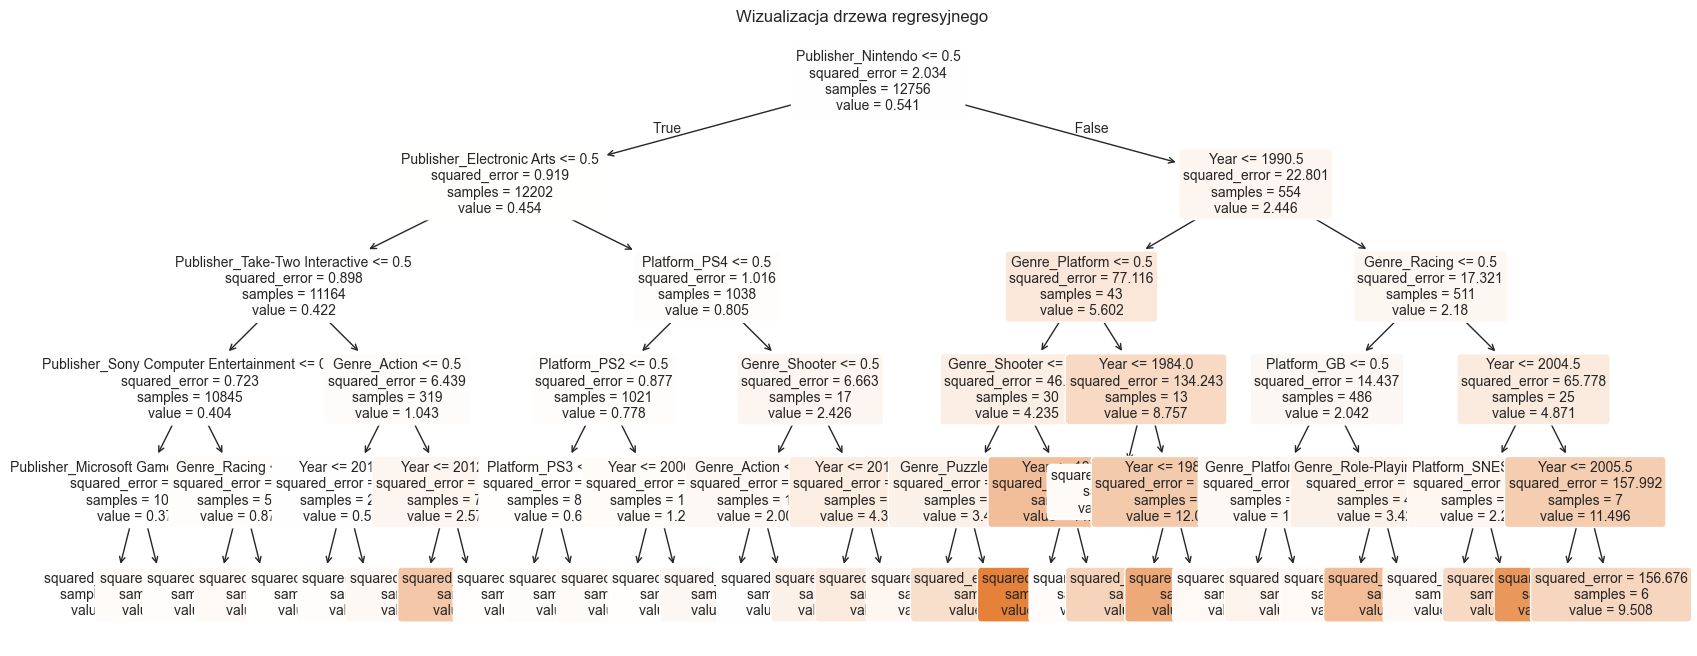

In [43]:
# Wyodrębnij nazwane cechy po one-hot encodingu
ohe = tree_pipeline.named_steps['pre'].named_transformers_['cat']
feature_names_cat = ohe.get_feature_names_out(categorical_cols)
feature_names = list(feature_names_cat) + numeric_cols

# Pobierz model drzewa
tree_model = tree_pipeline.named_steps['reg']

plt.figure(figsize=(20, 8))
plot_tree(tree_model, feature_names=feature_names, filled=True, rounded=True, fontsize=10)
plt.title("Wizualizacja drzewa regresyjnego")
plt.show()


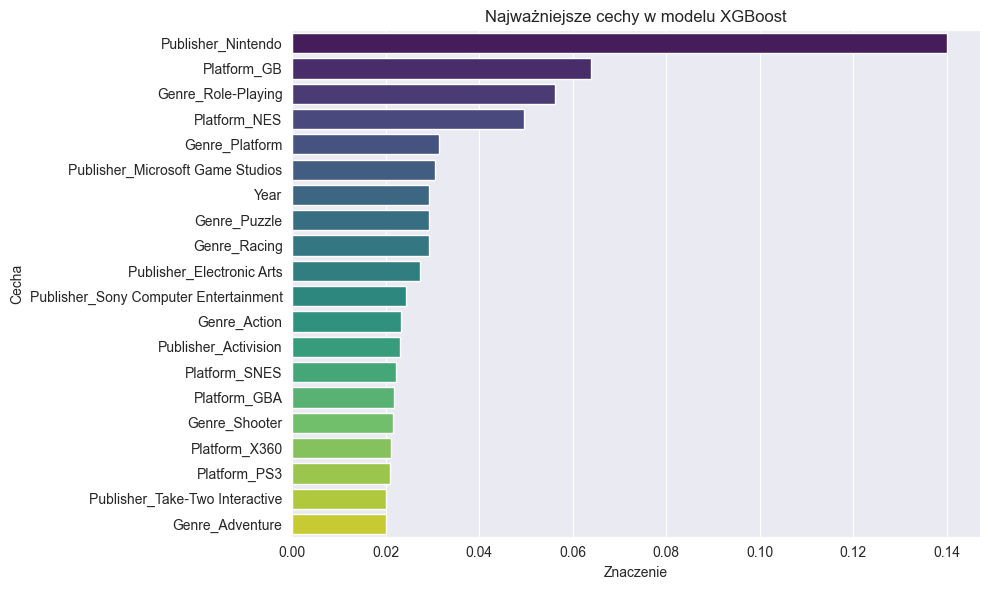

In [44]:
xgb_model = xgb_pipeline.named_steps['reg']
importances = xgb_model.feature_importances_

# Zbuduj listę nazw cech
feature_names_xgb = list(feature_names_cat) + numeric_cols
importance_df = pd.DataFrame({
    'Feature': feature_names_xgb,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Najważniejsze cechy w modelu XGBoost")
plt.xlabel("Znaczenie")
plt.ylabel("Cecha")
plt.tight_layout()
plt.show()
